In [1]:
import pandas as pd

digit_train = pd.read_csv("../input/digit-recognizer/train.csv")
digit_test = pd.read_csv("../input/digit-recognizer/test.csv")

df_train = digit_train.sample(frac=0.7, random_state=0)
df_valid = digit_train.drop(df_train.index)

X_train = df_train.drop("label", axis=1, inplace=False)
X_train = X_train.values.reshape(-1, 28, 28, 1)
y_train = df_train["label"]

X_valid = df_valid.drop("label", axis=1, inplace=False)
X_valid = X_valid.values.reshape(-1, 28, 28, 1)
y_valid = df_valid["label"]

In [2]:
df_train.size

23079000

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=3, activation="relu", padding='same',
                  input_shape=[28, 28, 1]),
    layers.MaxPool2D(),
    
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same'),
    layers.MaxPool2D(),
    
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding='same'),
    layers.MaxPool2D(),
    
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    
    layers.Flatten(),
    layers.Dense(16, activation='relu', input_shape=[784], 
        kernel_regularizer=keras.regularizers.L1(0.001)),
    
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    
    layers.Dense(16, activation='relu', 
        kernel_regularizer=keras.regularizers.L1(0.001)),
    
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    
    layers.Dense(10, activation='sigmoid'),
])

In [4]:
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [5]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=1000,
    callbacks=[early_stopping],
)

Epoch 1/1000
115/115 [==============================] - 31s 256ms/step - loss: 2.6908 - accuracy: 0.3223 - val_loss: 1.3002 - val_accuracy: 0.8796
Epoch 2/1000
115/115 [==============================] - 28s 243ms/step - loss: 1.5953 - accuracy: 0.6554 - val_loss: 0.7443 - val_accuracy: 0.9606
Epoch 3/1000
115/115 [==============================] - 28s 241ms/step - loss: 1.1260 - accuracy: 0.7397 - val_loss: 0.5284 - val_accuracy: 0.9693
Epoch 4/1000
115/115 [==============================] - 28s 244ms/step - loss: 0.8705 - accuracy: 0.7989 - val_loss: 0.4153 - val_accuracy: 0.9756
Epoch 5/1000
115/115 [==============================] - 28s 244ms/step - loss: 0.7698 - accuracy: 0.8244 - val_loss: 0.3193 - val_accuracy: 0.9789
Epoch 6/1000
115/115 [==============================] - 28s 241ms/step - loss: 0.6981 - accuracy: 0.8418 - val_loss: 0.2811 - val_accuracy: 0.9821
Epoch 7/1000
115/115 [==============================] - 28s 243ms/step - loss: 0.6492 - accuracy: 0.8561 - val_loss: 0

<AxesSubplot:>

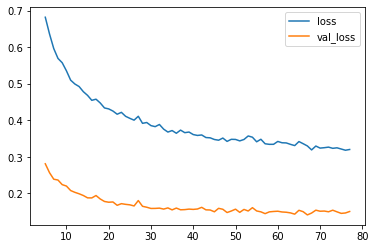

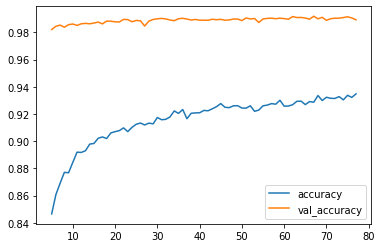

In [6]:
history_df = pd.DataFrame(history.history)
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['accuracy', 'val_accuracy']].plot()

In [7]:
import numpy as np

pred_sub = model.predict(digit_test.values.reshape(-1, 28, 28, 1))
pred_sub = [np.argmax(i) for i in pred_sub]
d = pd.read_csv("/kaggle/input/digit-recognizer/sample_submission.csv")
d["Label"] = pred_sub

d.to_csv("submission.csv", index=False)